I am going to show how to cluster your correlation matrix.  This can give you some interesting insights about your data that you would not pick up on without clustering.<br>  

First, I am to load in the wine dataset from sklearn. 

In [89]:
from sklearn.datasets import load_wine
import pandas as pd

In [90]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['y'] = wine.target 

Now make a correlation heatmap with seaborn 

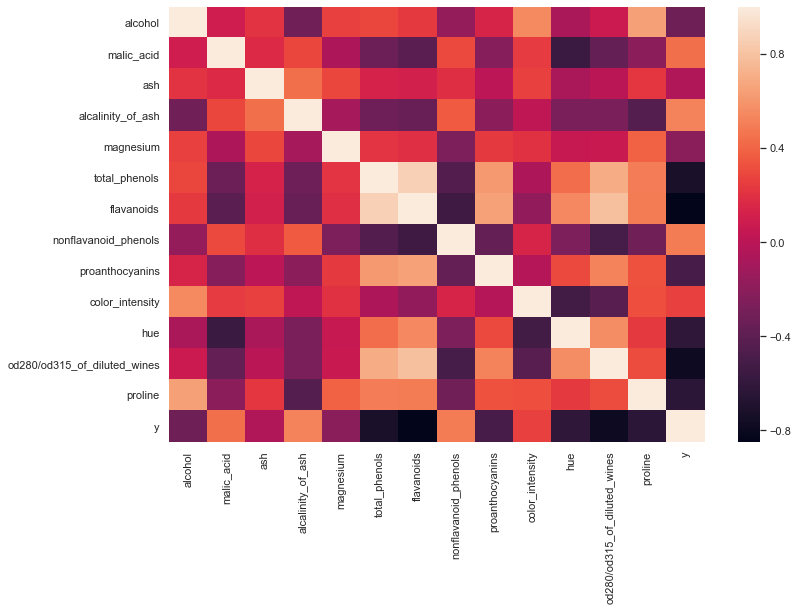

In [94]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(df.corr())

Now I am going to use a dendrogram to cluster the correlation matrix. 

In [92]:
from scipy.cluster import hierarchy
import numpy as np
cor = np.corrcoef(df.T)
order = np.array(hierarchy.dendrogram(hierarchy.ward(cor), no_plot=True)['ivl'], dtype="int")

Plot using matplotlib imshow and order the matrix by the order specified by the dendrogram.  

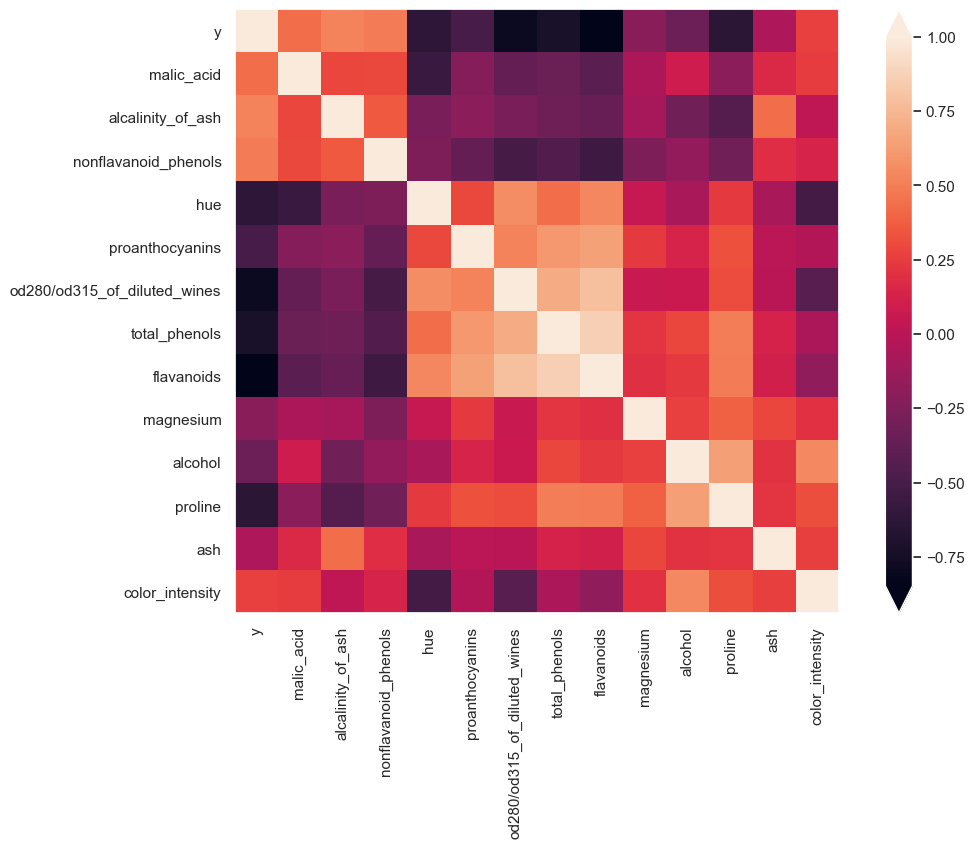

In [93]:
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(12, 8), dpi=100)
yep = plt.imshow(cor[order, :][:, order])
plt.xticks(range(df.shape[1]), df.columns[order], rotation = 90)
plt.yticks(range(df.shape[1]), df.columns[order]);
cbar = fig.colorbar(yep, extend='both')
#cbar.minorticks_on()

By ordering the data I can quickly see which variables are related to each other.  For example `hue`, `proanthocyanins`, `od280/od315_of_diluted_wines`, `total_phenols` all have negative correlation with `malic_acid`, `alcalinity_of_ash`, `nonflavanoid_phenols`.  We also see that there is a patch of features that are all highly correlated with each other. 